# Capítulo 16: Propriedades periódicas

Livro: Aprendendo Química com Python, Rodrigo Q. de Albuquerque & Gerd B. da Rocha, 2021, Amazon Book.

E-Mail: learn.chem.python@gmail.com

### Versão do Python usada

In [1]:
import sys
print(sys.version)

3.8.11 (default, Aug  3 2021, 15:09:35) 
[GCC 7.5.0]


### Estratégia para substituir o "." por "," nos eixos

In [2]:
# 1) Tente esse codigo:
from matplotlib import pyplot as plt
import locale
locale.setlocale(locale.LC_NUMERIC, ('de_DE', 'UTF-8'))
plt.rcParams.update({'axes.formatter.use_locale' : True})

In [2]:
# 2) Alternativamente, tente esse outro codigo:
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
plt.rcdefaults()
plt.rcParams['axes.formatter.use_locale'] = True
# https://herrmann.tech/pt/blog/2021/02/05/como-tratar-dados-com-formatacao-internacional-no-python.html

### Caixa de sessão interativa 54: Mendeleev: uso básico

In [2]:
from mendeleev import N
N.electrophilicity()              # eletrofilicidade (método)

1.353269450990578

In [3]:
N.atomic_radius              # raio atômico, em pm (atributo)

65.0

In [4]:
for isotope in N.isotopes:
    print(isotope) 

    7    14   14.00307 0.996
    7    15   15.00011 0.004


In [5]:
from mendeleev import element as el   # importação mais geral

In [6]:
el('Si').atomic_number # número atômico do silício (atributo)

14

In [7]:
el('Fe').atomic_weight    # massa molar do silício (atributo)

55.845

In [8]:
el('N').electronegativity_pauling()      # esse é um 'método'

3.04

In [9]:
G17 = ['F', 'Cl', 'Br', 'I']             # Não incluímos 'At'

In [10]:
radius = []

In [11]:
for atom in G17:
    r = el(atom).atomic_radius
    radius.append([atom, r])

In [12]:
radius

[['F', 50.0], ['Cl', 100.0], ['Br', 115.0], ['I', 140.0]]

### Caixa de código 41: Algumas propriedades dos metais alcalinos (grupo 1)

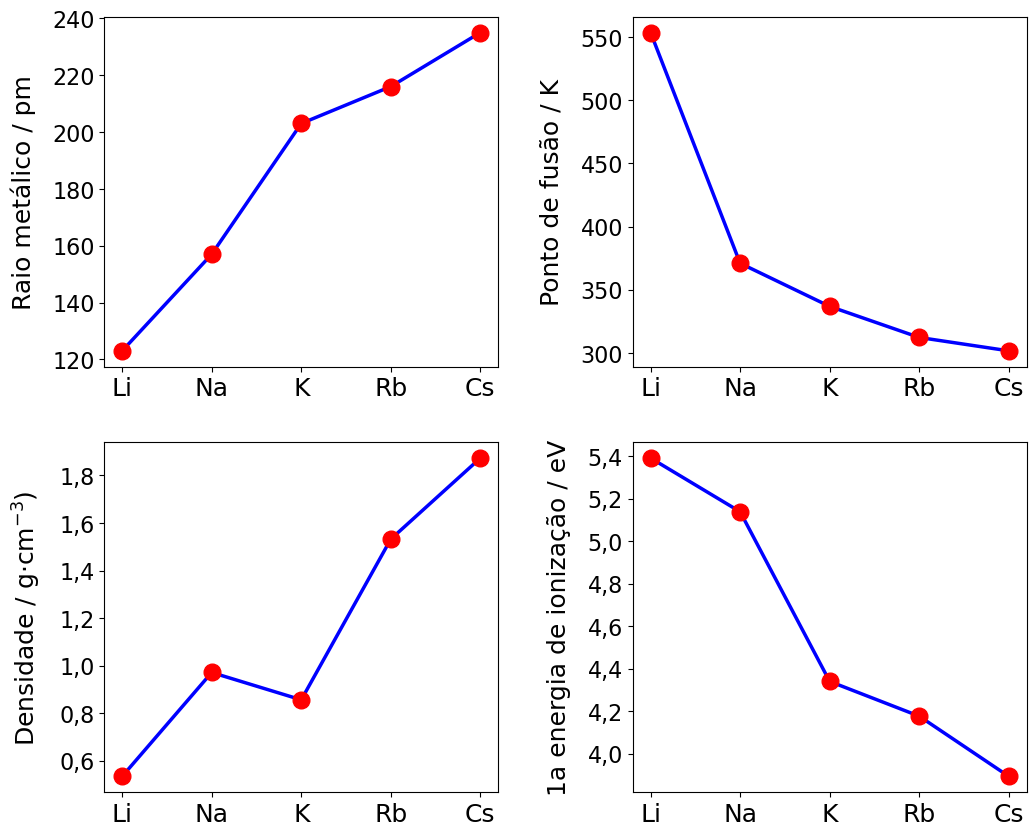

In [17]:
from mendeleev import element as el
from matplotlib import pyplot as plt
import numpy as np
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
plt.rcParams.update({'axes.formatter.use_locale' : True})
M, props = ['Li', 'Na', 'K', 'Rb', 'Cs'], []   # Frâncio excluído
for symbol in M:
    atom = el(symbol)
    mr = atom.metallic_radius                # raio metálico (pm)
    mp = atom.melting_point                  # ponto de fusao (K)
    d = atom.density                 # densidade do metal (g/cm3)
    ie = atom.ionenergies[1]       # 1a energia de ionização (eV)
    props.append([mr, mp, d, ie])
props = np.array(props)
labels = ['Raio metálico / pm', 'Ponto de fusão / K', 'Densidade / g$\cdot$cm$^{-3}$)', '1a energia de ionização / eV']
plt.figure(figsize = (11,9))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(props[:,i], '-b', lw = 2.5)
    plt.plot(props[:,i], 'ro', ms = 12)
    plt.xticks(np.arange(5), M, fontsize = 18)    
    plt.yticks(fontsize = 16)
    plt.ylabel(labels[i], fontsize = 18, labelpad = 12)
    plt.tight_layout(pad = 3)
plt.savefig('mendeleev_2.png', dpi = 400)

### 

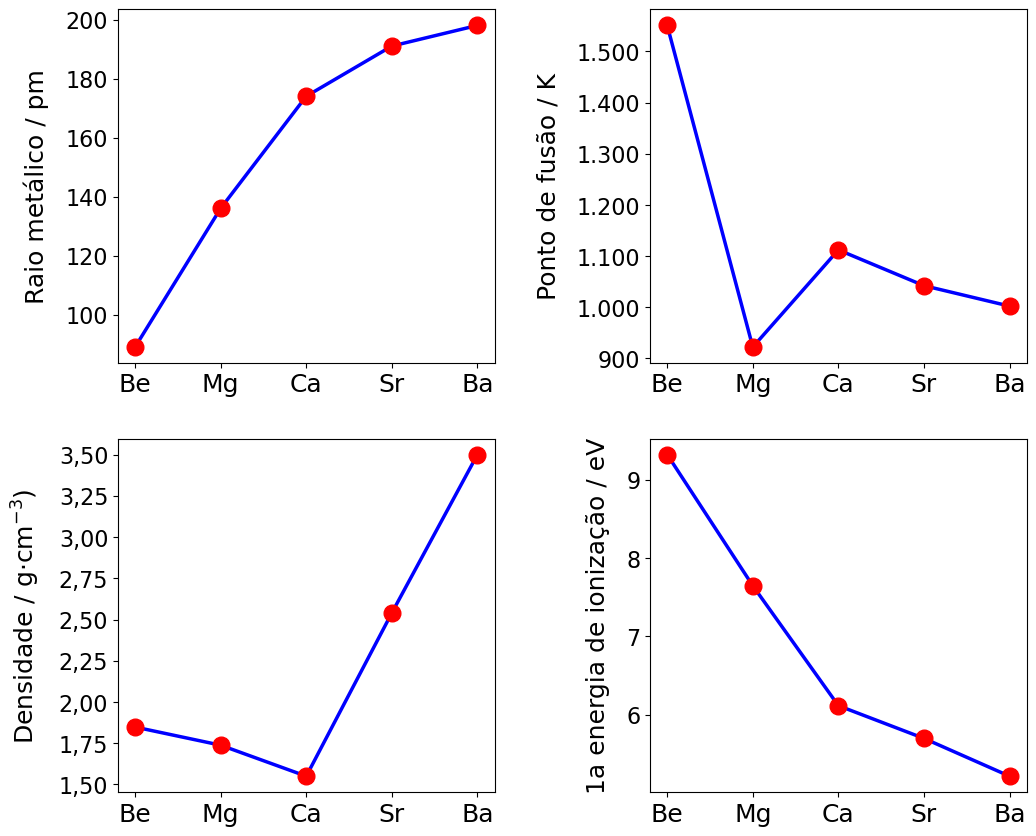

In [18]:
from mendeleev import element as el
from matplotlib import pyplot as plt
import numpy as np
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
plt.rcParams.update({'axes.formatter.use_locale' : True})
M, props = ['Be', 'Mg', 'Ca', 'Sr', 'Ba'], []
for symbol in M:
    atom = el(symbol)
    mr = atom.metallic_radius                # raio metálico (pm)
    mp = atom.melting_point                  # ponto de fusao (K)
    d = atom.density                 # densidade do metal (g/cm3)
    ie = atom.ionenergies[1]       # 1a energia de ionização (eV)
    props.append([mr, mp, d, ie])
props = np.array(props)
labels = ['Raio metálico / pm', 'Ponto de fusão / K', 'Densidade / g$\cdot$cm$^{-3}$)', '1a energia de ionização / eV']
plt.figure(figsize = (11,9))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(props[:,i], '-b', lw = 2.5)
    plt.plot(props[:,i], 'ro', ms = 12)
    plt.xticks(np.arange(5), M, fontsize = 18)    
    plt.yticks(fontsize = 16)
    plt.ylabel(labels[i], fontsize = 18, labelpad = 12)
    plt.tight_layout(pad = 3)
plt.savefig('mendeleev_alcalinos_terrosos.png', dpi = 400)

### Caixa de código 42:Energias de ionização para Z = 1-100

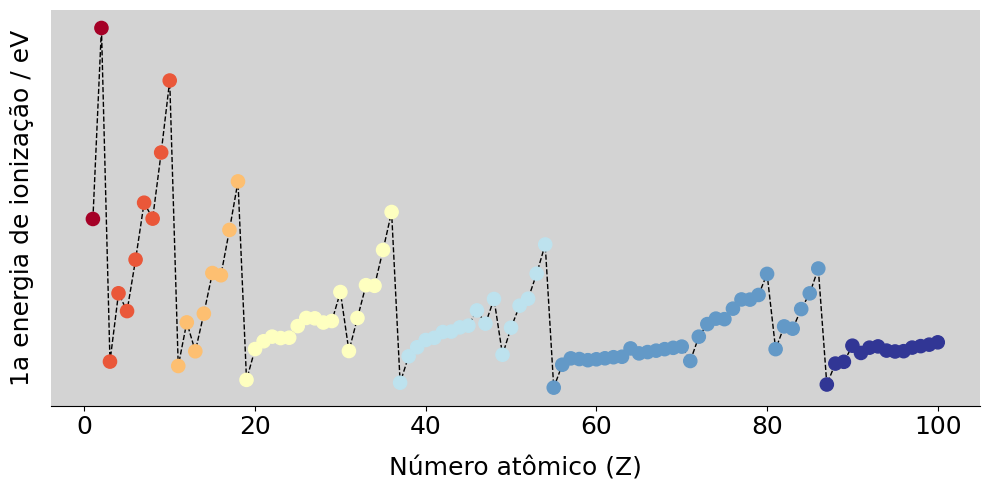

In [19]:
from mendeleev import element as el
from matplotlib import pyplot as plt
plt.rcParams['axes.spines.right'] = False  # remover eixo direito
plt.rcParams['axes.spines.top'] = False   # remover eixo superior
plt.rcParams['axes.spines.left'] = False   # remova eixo esquerdo
plt.rcParams['axes.facecolor'] = 'lightgray'  # fundo cinza claro
Z = [n + 1 for n in range(100)]      # ou Z = numpy.arange(1,101)
ies, periods = [], []
for number in Z:
    atom = el(number)
    ie = atom.ionenergies[1]       # 1a energia de ionização (eV)
    ies.append(ie)     # lista com todas as energias de ionização
    periods.append(atom.period)           # lista com os períodos
plt.figure(figsize = (10,5))
plt.plot(Z, ies, '--', color = 'black', lw = 1, zorder = 1)
plt.scatter(Z, ies, c=periods, s=90, zorder = 2, cmap = 'RdYlBu')
plt.xticks(fontsize = 18)    
plt.yticks([])                         # remova números do eixo Y
plt.ylabel('1a energia de ionização / eV', fontsize = 18, labelpad = 12)
plt.xlabel('Número atômico (Z)', fontsize = 18, labelpad = 12)
plt.tight_layout()
plt.savefig('mendeleev_4.png', dpi = 400)

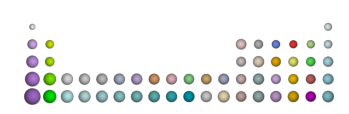

In [4]:
from ase.io import write
from ase import Atoms
from mendeleev import element as el
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
Z = np.arange(1,55)
coords, labels, r = [], [], []
for number in Z:
    atom = el(int(number))
    period, group = atom.period, atom.group_id
    r.append(atom.vdw_radius/650)
    labels.append(atom.symbol)
    coords.append([period, group, 0])
mol = Atoms(positions = coords, symbols = labels)
mydict = dict(canvas_height = 300)
image = write('mol.pov', mol, radii = r, povray_settings = mydict, rotation='-90z')
image.render()           # renderize a molécula, salve em mol.png
img = mpimg.imread('mol.png')                 # importe 'mol.png'
plt.figure(figsize = (6,2)) 
plt.imshow(img)                        # plote os pixels de 'img'
plt.axis('off')                                 # remova os eixos
plt.savefig('mendeleev_5.png', dpi = 1200, transparent = True)  # Salve a figura final